In [1]:
pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 15.4 MB/s eta 0:00:01
   -- ------------------------------------- 0.9/13.3 MB 10.9 MB/s eta 0:00:02
   --- ------------------------------------ 1.3/13.3 MB 10.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.6/13.3 MB 9.5 MB/s eta 0:00:02
   ----- ---------------------------------- 2.0/13.3 MB 8.9 MB/s eta 0:00:02
   ------ --------------------------------- 2.3/13.3 MB 9.1 MB/s eta 0:00:02
   ------- -------------------------------- 2.6/13.3 MB 8.8 MB/s eta 0:00:02
   --------- ------------------------------ 3.0/13.3 MB 8.8 MB/s eta 0:00:02
   ---------- ----------------------------- 3.4/13.3 MB 8.6 MB/s eta 0:00:02
   ----------- ---------------------------- 3.8/13.3 MB 8.6 MB/s eta 0:00:02
   ------------ --------------------------- 4.1/13.3 MB 8.8 MB/s eta 0:00:02
   ------------- -------------------------- 4.5/13.3 MB 8.5 MB/s eta 0:00:02
   


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load the dataset
file_path =("C:\\Users\\devika\\OneDrive\\Desktop\\p4-28.csv")
data = pd.read_csv(file_path)

In [4]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
         Date       Open       High        Low      Close  Adj Close  \
0  05-01-2004  53.898628  57.016964  53.568394  56.700886  42.897266   
1  06-01-2004  56.799953  58.436962  55.865868  56.719753  42.911533   
2  07-01-2004  57.809521  57.809521  55.125206  56.290455  42.586750   
3  08-01-2004  56.799953  59.347462  56.799953  58.569057  44.310638   
4  09-01-2004  59.253109  61.423206  58.970051  60.390053  45.688313   

       Volume  
0  68132760.0  
1  84466581.0  
2  71533904.0  
3  44911270.0  
4  73303987.0  


In [5]:
# Get a summary of the dataset
print("\nDataset information:")
data.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5100 non-null   object 
 1   Open       5091 non-null   float64
 2   High       5091 non-null   float64
 3   Low        5091 non-null   float64
 4   Close      5091 non-null   float64
 5   Adj Close  5091 non-null   float64
 6   Volume     5091 non-null   float64
dtypes: float64(6), object(1)
memory usage: 279.0+ KB


In [6]:
print(data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [7]:
# Get a summary of the statistical data
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
              Open         High          Low        Close    Adj Close  \
count  5091.000000  5091.000000  5091.000000  5091.000000  5091.000000   
mean    259.404107   262.781202   255.606058   259.080835   238.031544   
std     160.901153   162.289706   159.286365   160.802900   161.905802   
min      38.401299    40.076046    36.797314    38.561695    29.173988   
25%     163.794998   166.467506   160.219918   163.457504   140.678871   
50%     230.899994   233.699997   227.610001   230.365005   202.508728   
75%     298.774994   303.149994   294.475006   298.402496   275.491349   
max     897.000000   912.000000   883.299988   905.650024   905.650024   

             Volume  
count  5.091000e+03  
mean   2.436879e+07  
std    1.799988e+07  
min    0.000000e+00  
25%    1.353107e+07  
50%    1.920273e+07  
75%    2.875753e+07  
max    2.626771e+08  


In [8]:
# Check for missing values in the dataset
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Date         0
Open         9
High         9
Low          9
Close        9
Adj Close    9
Volume       9
dtype: int64


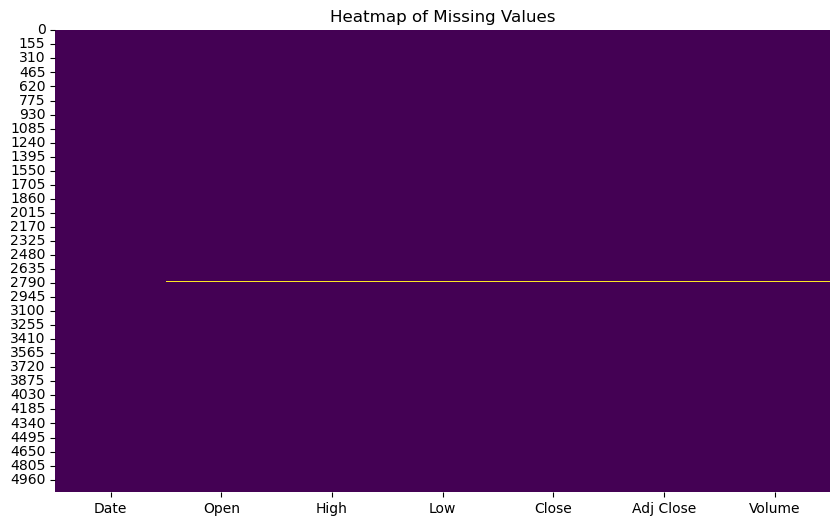

In [9]:
# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.show()

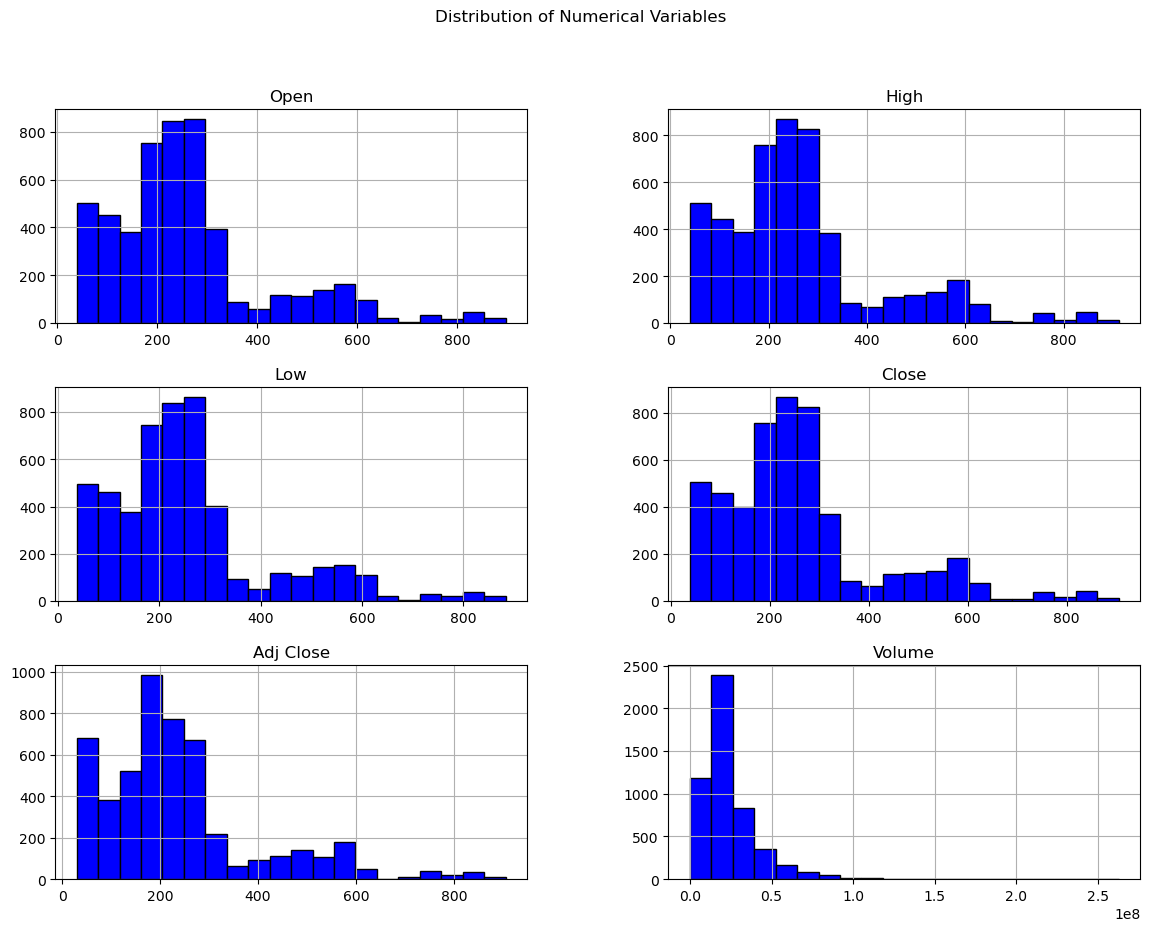

In [10]:
# Plot histograms for numerical variables
data.hist(figsize=(14, 10), bins=20, color='blue', edgecolor='black')
plt.suptitle("Distribution of Numerical Variables")
plt.show()

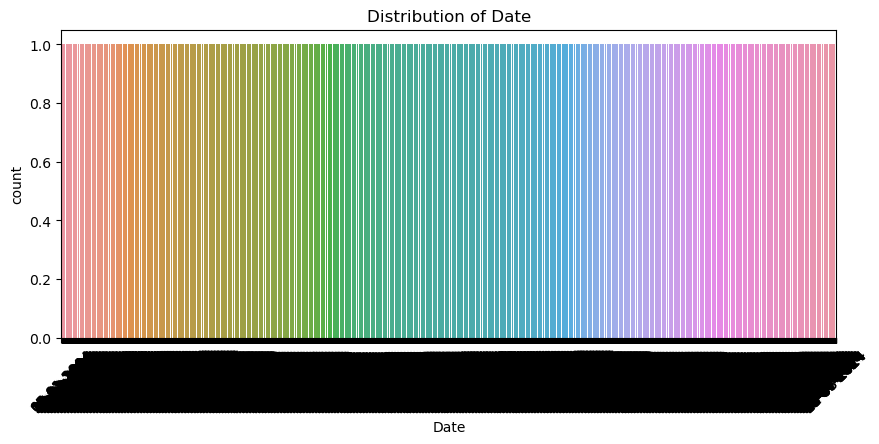

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=data[col])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()



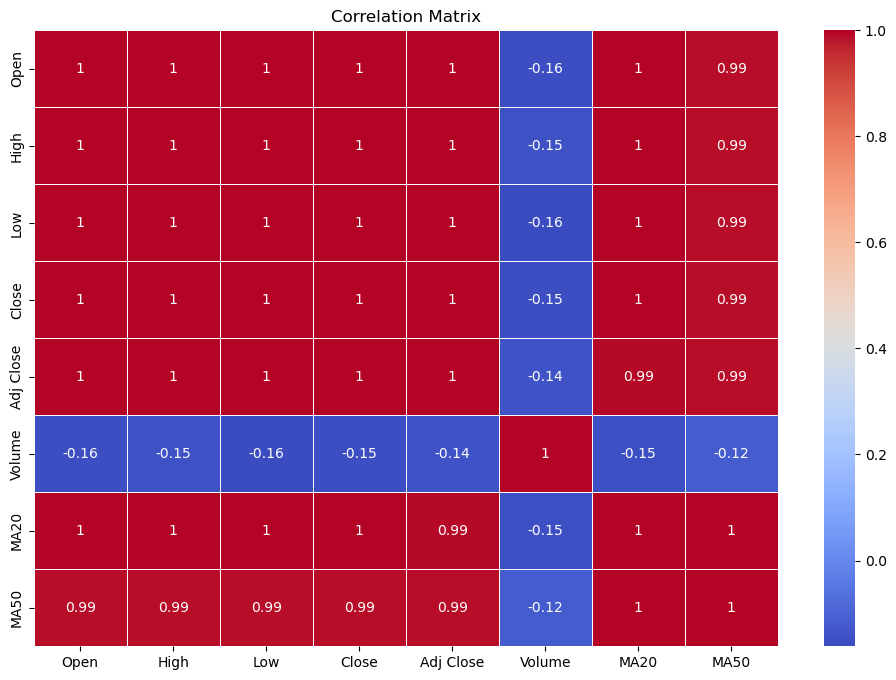

In [29]:
# Select only numeric columns for correlation matrix calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [30]:
# Convert the 'Date' column to datetime format with dayfirst=True
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Set the date as the index
data.set_index('Date', inplace=True)

# Display the first few rows to confirm the conversion
print("First few rows with Date as index:")
print(data.head())

First few rows with Date as index:
                 Open       High        Low      Close  Adj Close      Volume  \
Date                                                                            
2004-01-05  53.898628  57.016964  53.568394  56.700886  42.897266  68132760.0   
2004-01-06  56.799953  58.436962  55.865868  56.719753  42.911533  84466581.0   
2004-01-07  57.809521  57.809521  55.125206  56.290455  42.586750  71533904.0   
2004-01-08  56.799953  59.347462  56.799953  58.569057  44.310638  44911270.0   
2004-01-09  59.253109  61.423206  58.970051  60.390053  45.688313  73303987.0   

            MA20  MA50  
Date                    
2004-01-05   NaN   NaN  
2004-01-06   NaN   NaN  
2004-01-07   NaN   NaN  
2004-01-08   NaN   NaN  
2004-01-09   NaN   NaN  


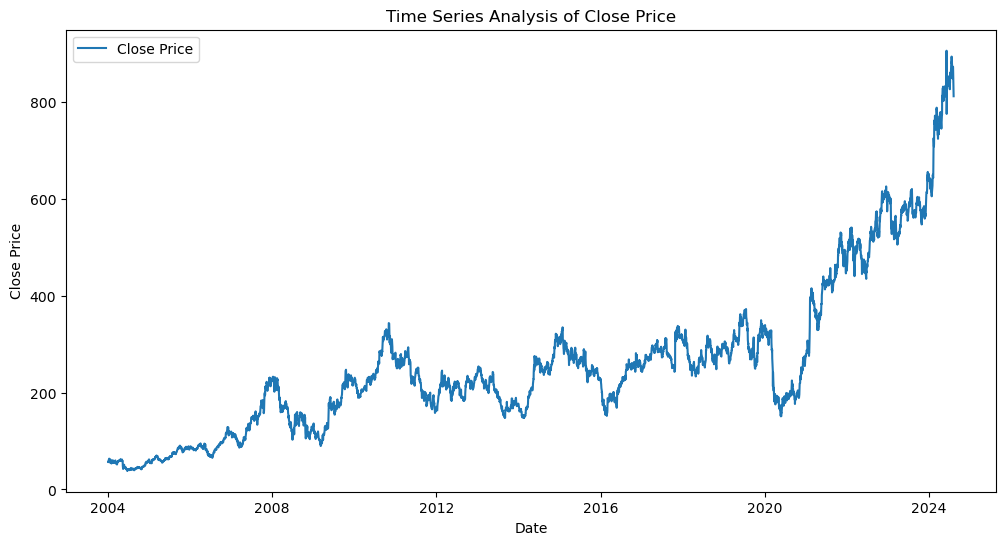

In [31]:
# Plot the time series data (for a specific column, e.g., 'Close')
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.title("Time Series Analysis of Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

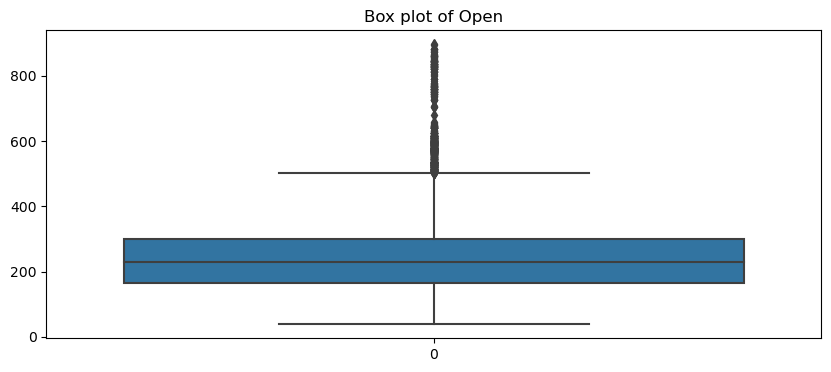

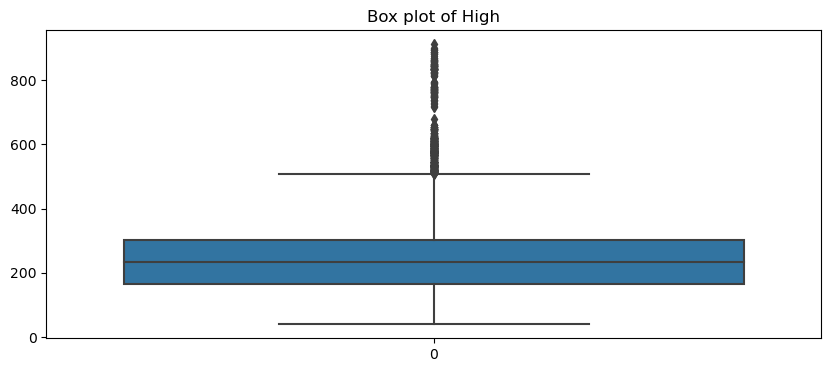

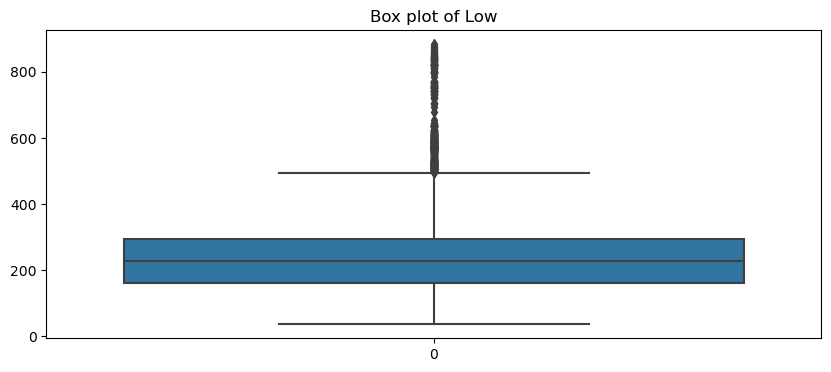

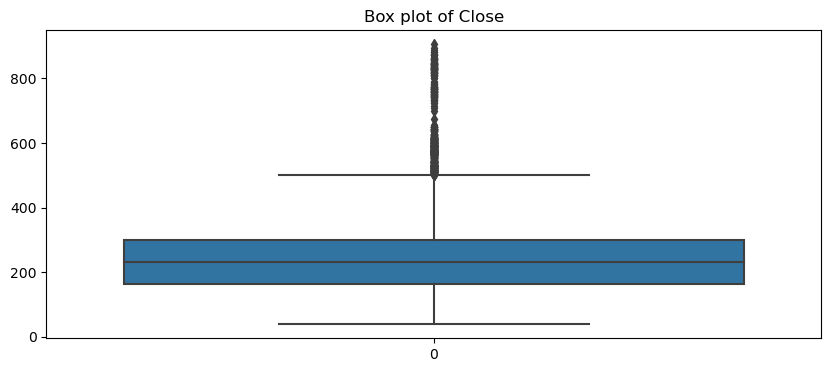

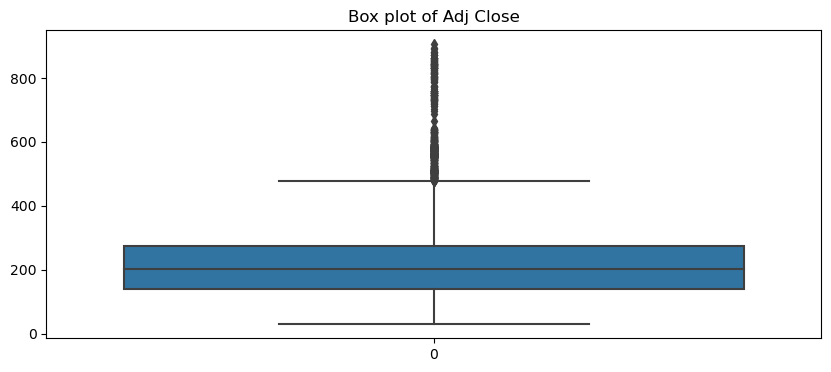

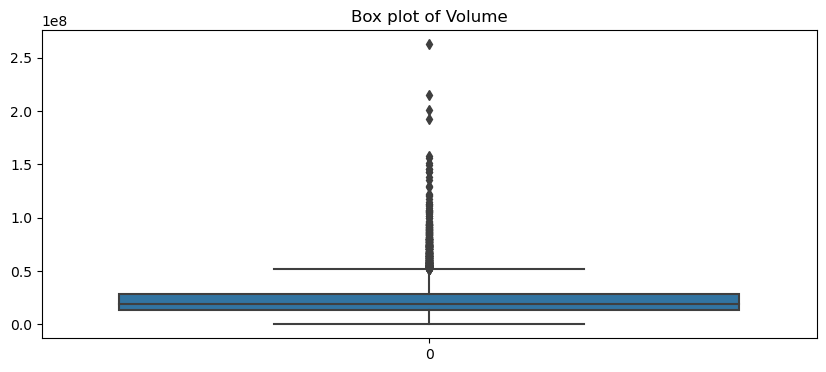

In [15]:
# Box plots to detect outliers in numerical variables
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data[col])
    plt.title(f"Box plot of {col}")
    plt.show()

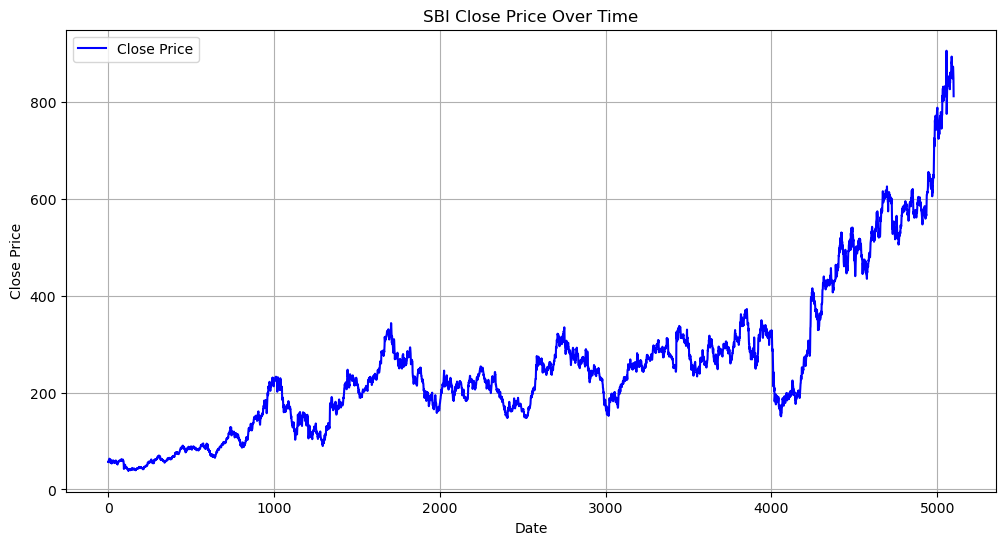

In [16]:
import matplotlib.pyplot as plt

# Line plot for 'Close' prices over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], color='blue', label='Close Price')
plt.title("SBI Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

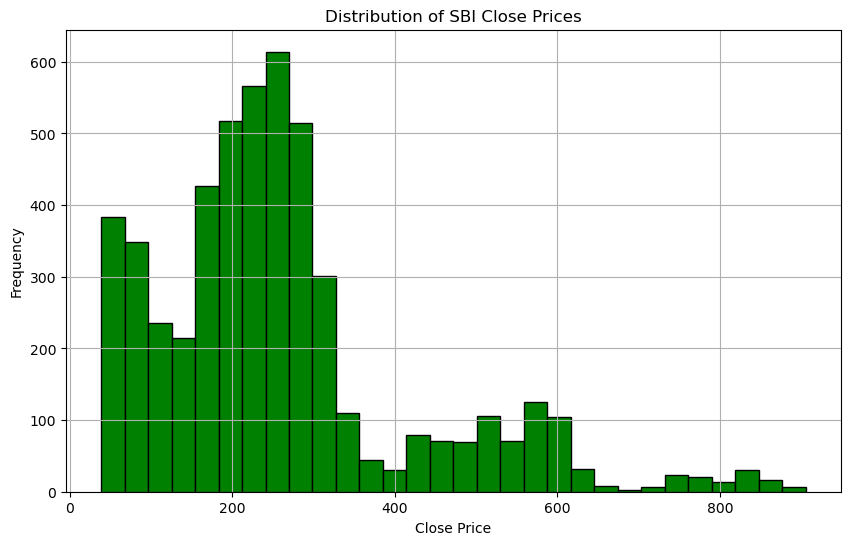

In [17]:
# Histogram for 'Close' prices
plt.figure(figsize=(10, 6))
plt.hist(data['Close'], bins=30, color='green', edgecolor='black')
plt.title("Distribution of SBI Close Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

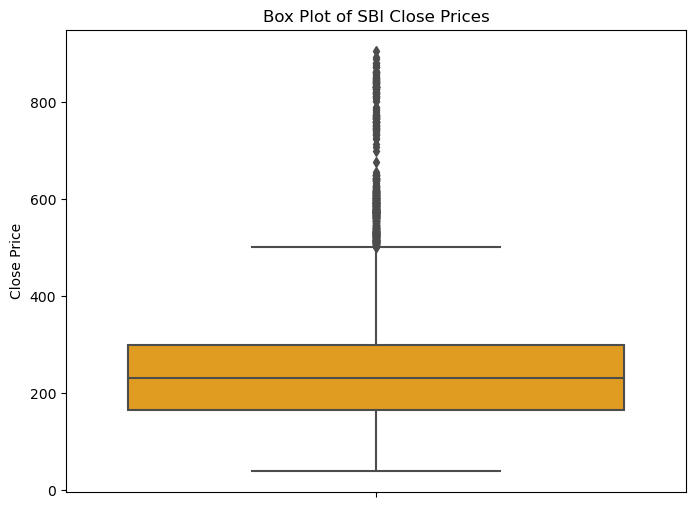

In [18]:
import seaborn as sns

# Box plot for 'Close' prices
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Close'], color='orange')
plt.title("Box Plot of SBI Close Prices")
plt.ylabel("Close Price")
plt.show()


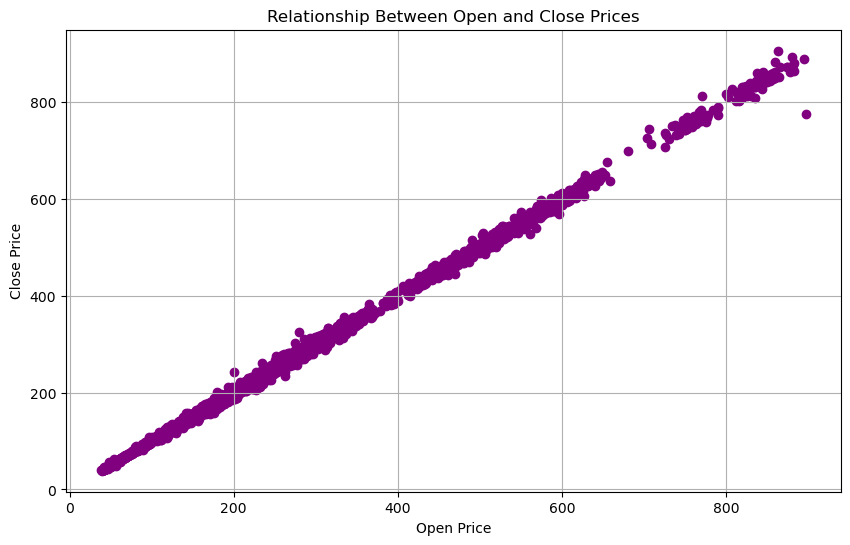

In [19]:
# Scatter plot between 'Open' and 'Close' prices
plt.figure(figsize=(10, 6))
plt.scatter(data['Open'], data['Close'], color='purple')
plt.title("Relationship Between Open and Close Prices")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

C:\Users\devika\AppData\Local\Temp\ipykernel_26232\2205076488.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


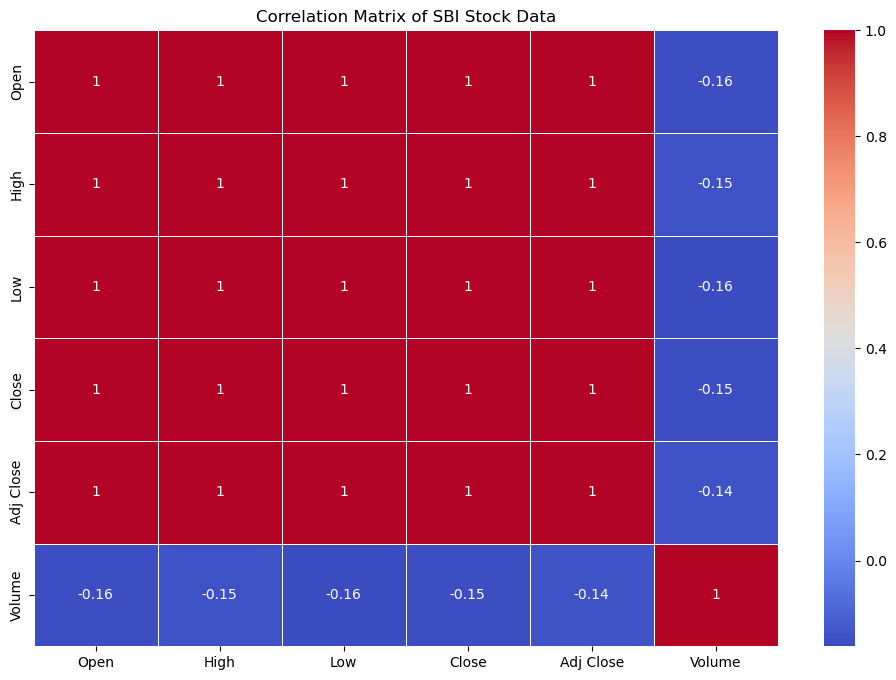

In [20]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of SBI Stock Data")
plt.show()

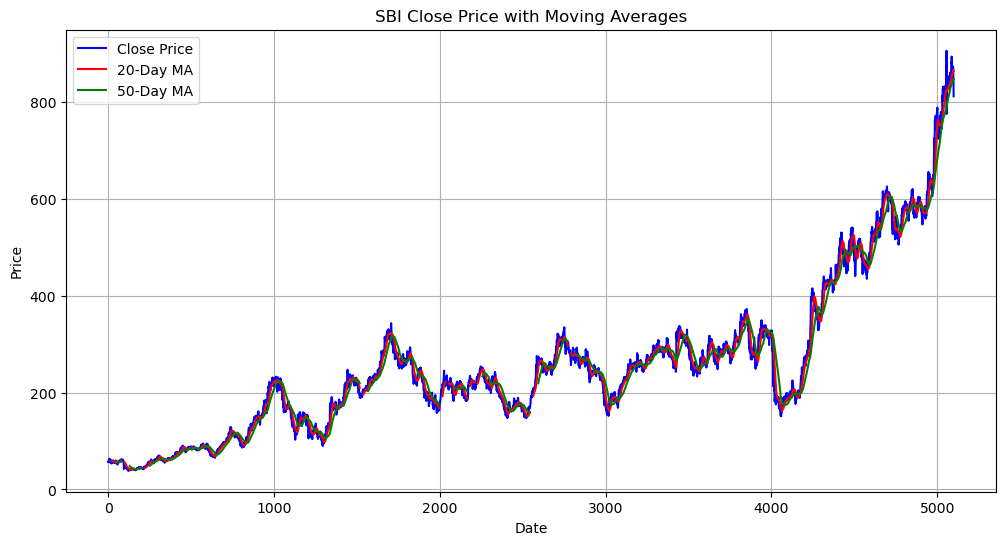

In [21]:
# Calculate moving averages
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

# Plot the Close Price with Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], color='blue', label='Close Price')
plt.plot(data.index, data['MA20'], color='red', label='20-Day MA')
plt.plot(data.index, data['MA50'], color='green', label='50-Day MA')
plt.title("SBI Close Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [32]:
!pip install mplfinance




[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\devika\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


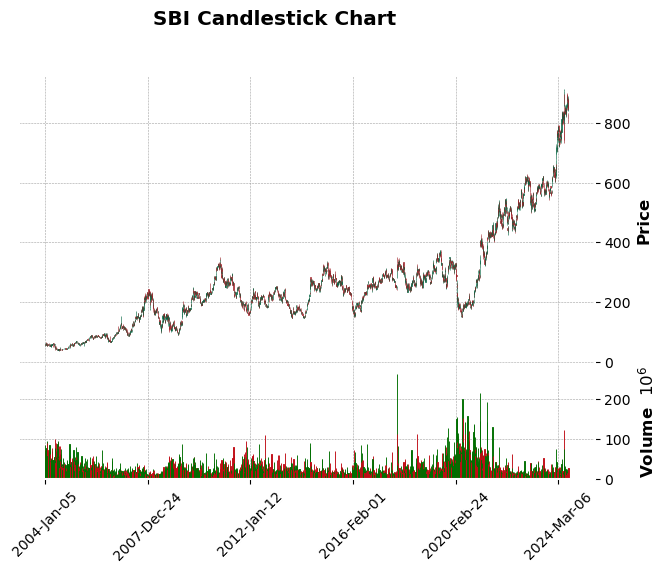

In [33]:
import mplfinance as mpf

# Plot a candlestick chart
mpf.plot(data, type='candle', style='charles', title='SBI Candlestick Chart', ylabel='Price', volume=True)


C:\Users\devika\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


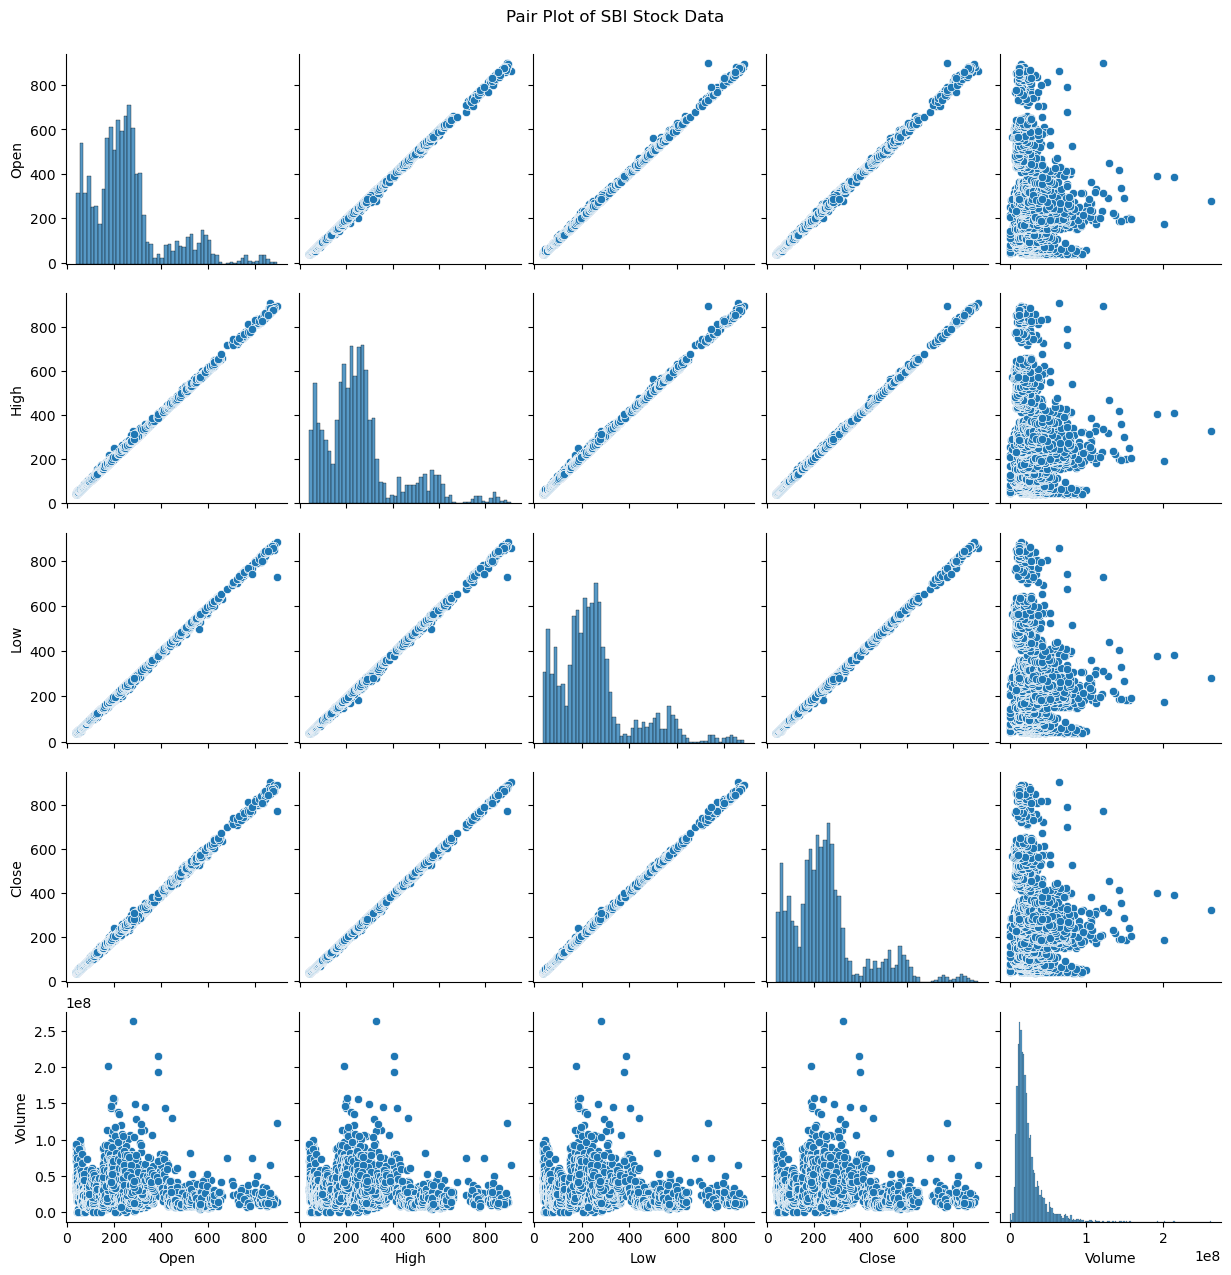

In [23]:
# Pair plot for selected columns
sns.pairplot(data[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.suptitle("Pair Plot of SBI Stock Data", y=1.02)
plt.show()

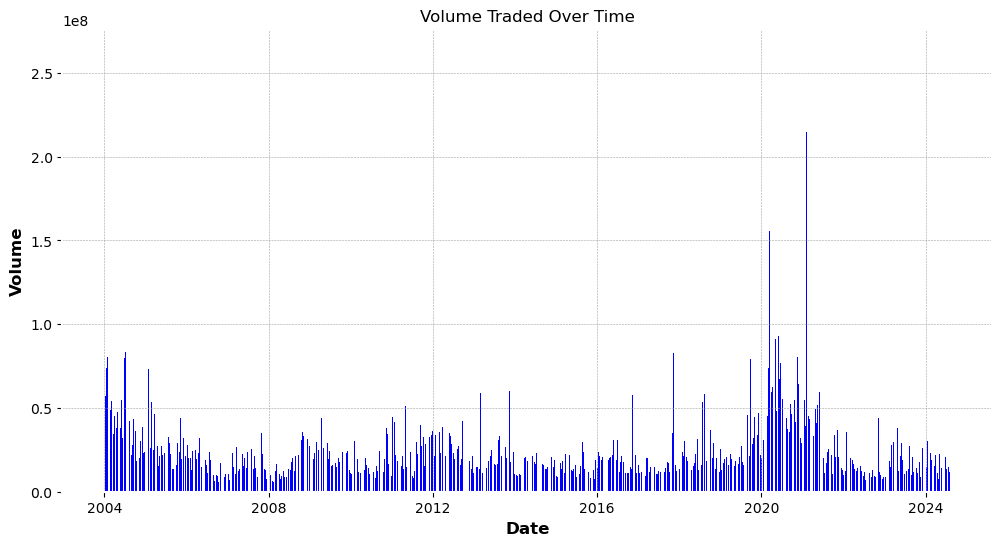

In [34]:
# Bar plot for volume traded over time
plt.figure(figsize=(12, 6))
plt.bar(data.index, data['Volume'], color='blue')
plt.title("Volume Traded Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

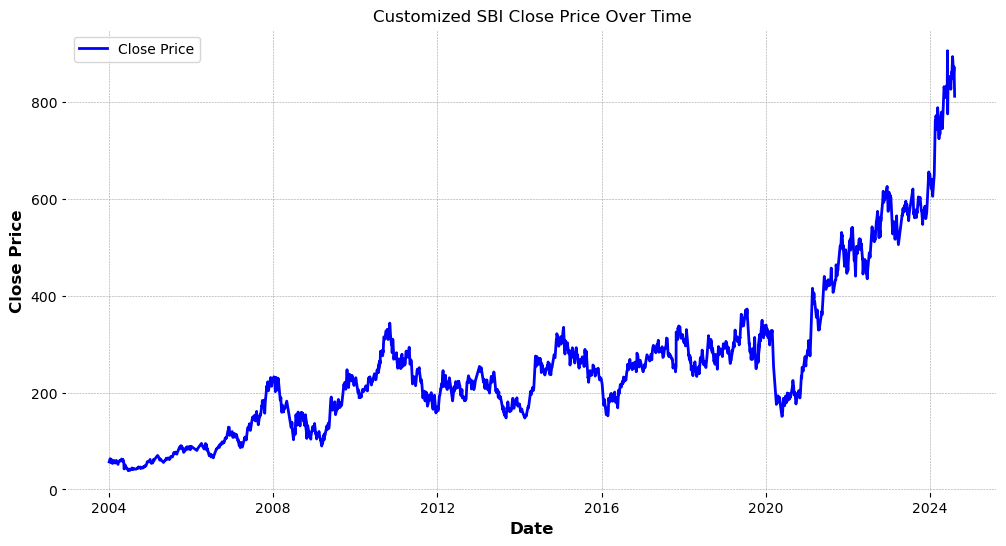

In [35]:
# Example customization with title, labels, and legend
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], color='blue', label='Close Price')
plt.title("Customized SBI Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

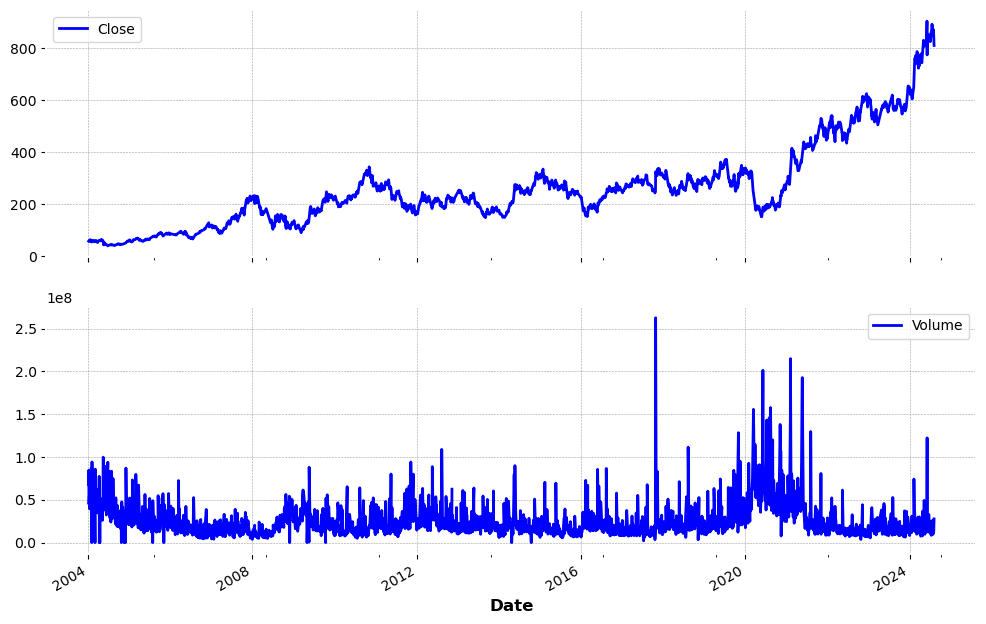

In [36]:
data[['Close', 'Volume']].plot(subplots=True, style='b',
figsize=(12, 8));

In [37]:
data['simple_rtn'] = data.Close.pct_change()
data['log_rtn'] = np.log(data.Close/data.Close.shift(1))

array([<Axes: xlabel='Date'>], dtype=object)

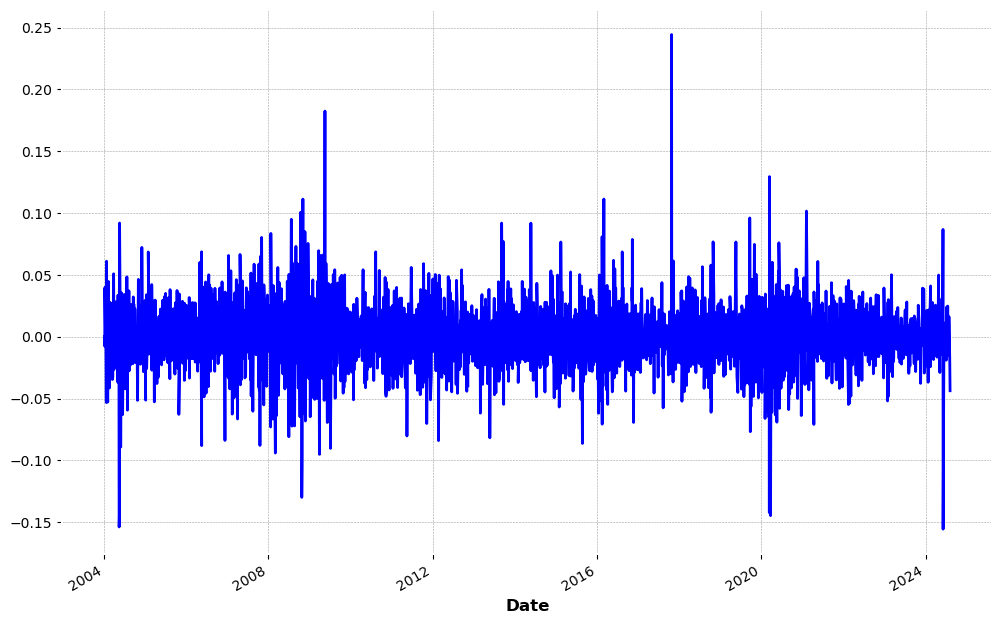

In [38]:
data['log_rtn'].plot(subplots=True, style='b',
figsize=(12, 8))

In [39]:
data['log_rtn'].tail(12)

Date
2024-07-19   -0.004711
2024-07-22   -0.014212
2024-07-23   -0.014822
2024-07-24   -0.013871
2024-07-25   -0.004116
2024-07-26    0.016307
2024-07-29    0.010553
2024-07-30    0.001376
2024-07-31   -0.000458
2024-08-01   -0.011239
2024-08-02   -0.017305
2024-08-05   -0.043634
Name: log_rtn, dtype: float64

In [40]:
import statsmodels.api as sm
import scipy.stats as scs
r_range = np.linspace(min(data.log_rtn), max(data.log_rtn), num=1000)
mu = data.log_rtn.mean()
sigma = data.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

C:\Users\devika\AppData\Local\Temp\ipykernel_26232\480777069.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.log_rtn, kde=False, norm_hist=True, ax=ax[0])


Text(0.5, 1.0, 'Q-Q plot')

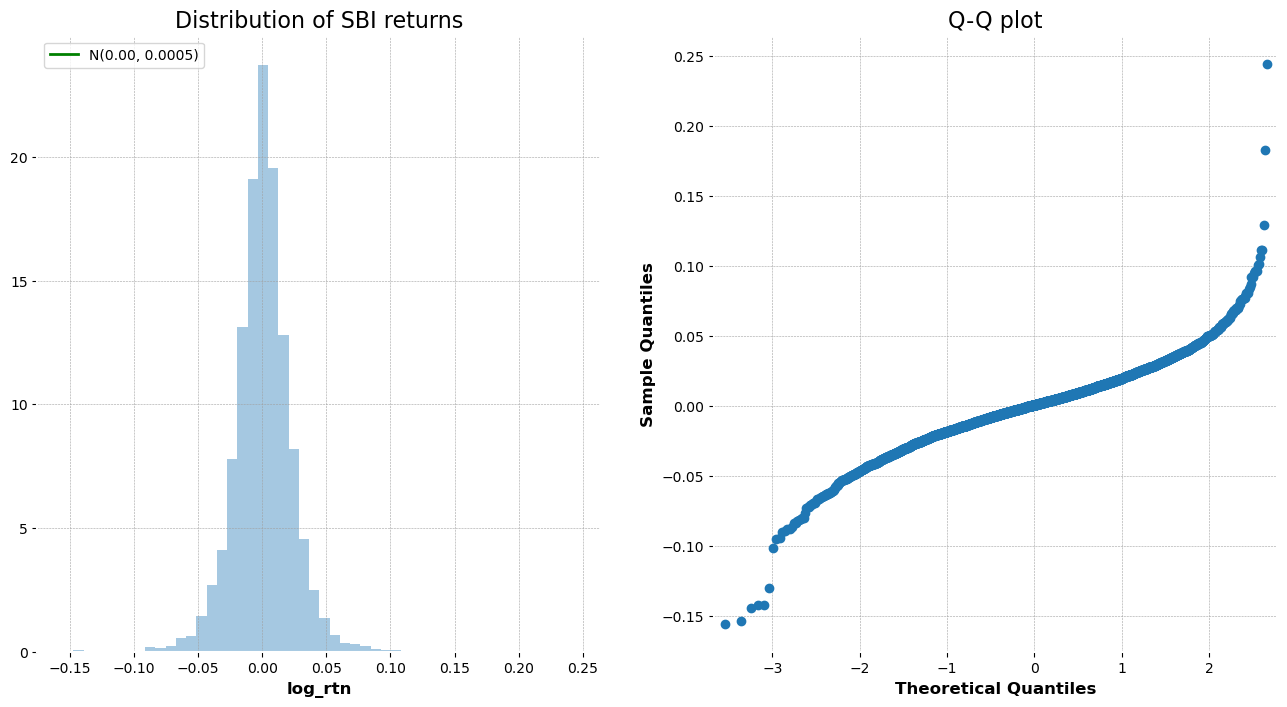

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
# histogram
sns.distplot(data.log_rtn, kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('Distribution of SBI returns', fontsize=16)
ax[0].plot(r_range, norm_pdf, 'g', lw=2,
label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');
# Q-Q plot
qq = sm.qqplot(data.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

In [42]:
data['moving_std_252'] = data[['log_rtn']].rolling(window=252).std()
data['moving_std_21'] = data[['log_rtn']].rolling(window=21).std()

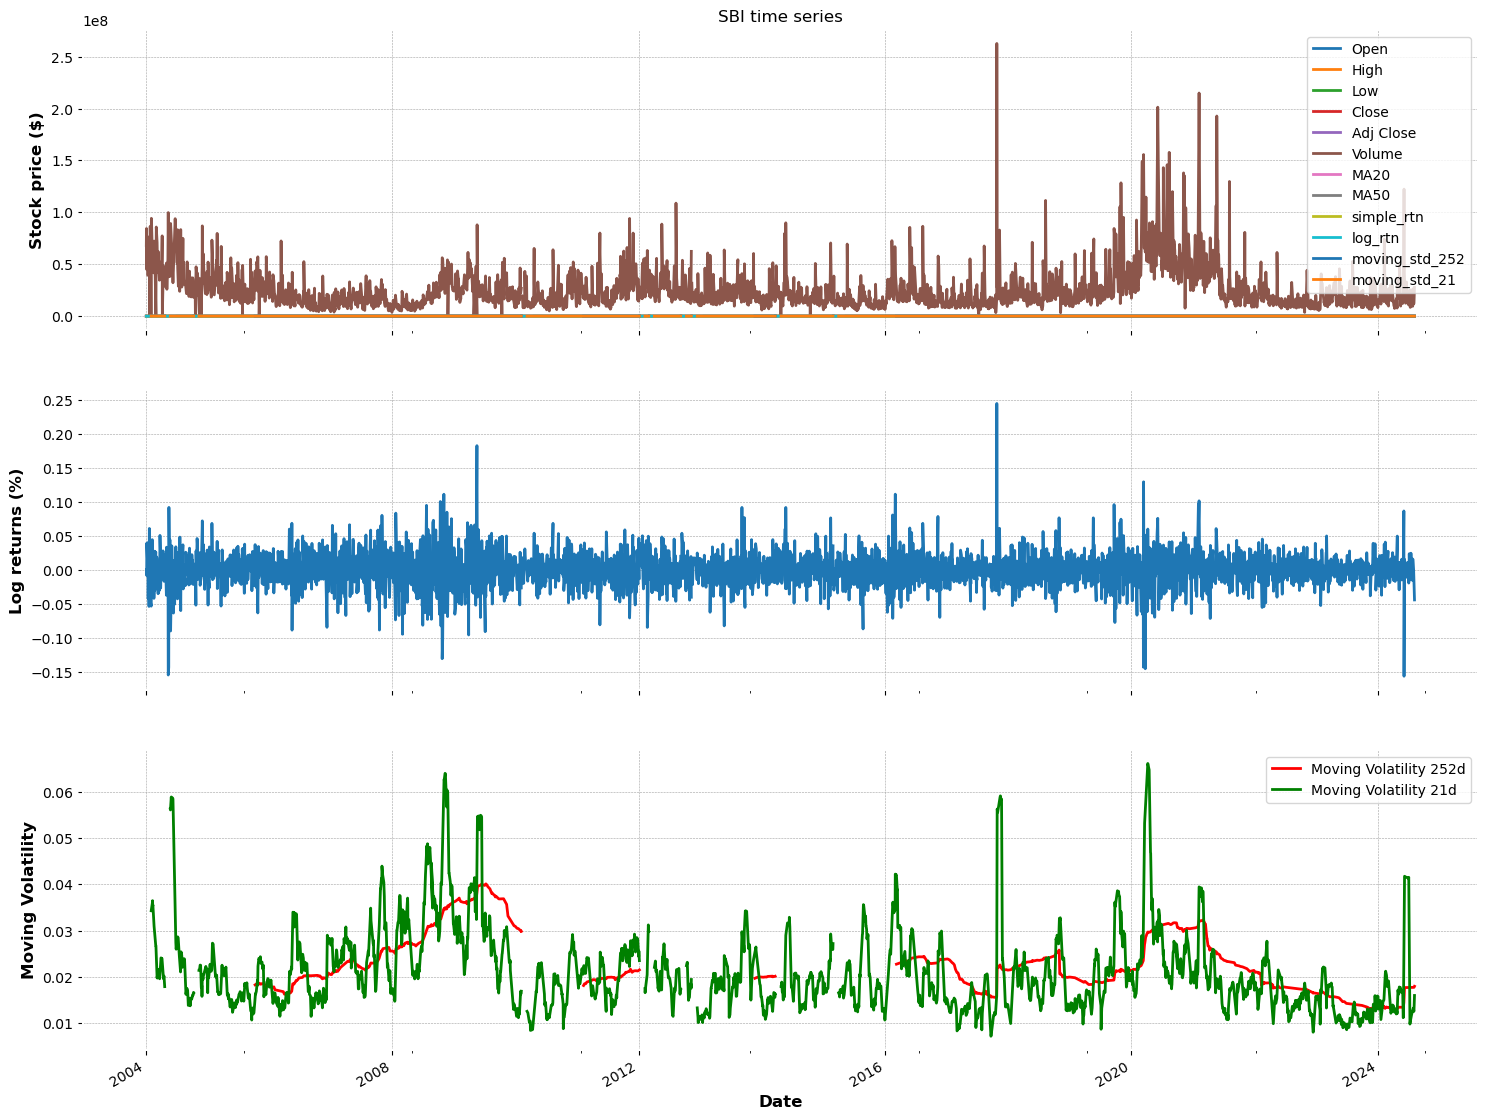

In [43]:
fig, ax = plt.subplots(3, 1, figsize=(18, 15),
sharex=True)
data.plot(ax=ax[0])
ax[0].set(title='SBI time series',
ylabel='Stock price ($)')
data.log_rtn.plot(ax=ax[1])
ax[1].set(ylabel='Log returns (%)')
data.moving_std_252.plot(ax=ax[2], color='r',
label='Moving Volatility 252d')
data.moving_std_21.plot(ax=ax[2], color='g',
label='Moving Volatility 21d')
ax[2].set(ylabel='Moving Volatility',
xlabel='Date')
ax[2].legend()

In [44]:
# Feature Engineering
# Extract day, month, and year from the Date
data['Day'] = data.index.day
data['Month'] = data.index.month
data['Year'] = data.index.year

# Display the new columns
print("Data with Day, Month, and Year columns:")
print(data[['Day', 'Month', 'Year']].head())

Data with Day, Month, and Year columns:
            Day  Month  Year
Date                        
2004-01-05    5      1  2004
2004-01-06    6      1  2004
2004-01-07    7      1  2004
2004-01-08    8      1  2004
2004-01-09    9      1  2004


In [45]:
# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Display the daily returns
print("Daily Returns:")
print(data[['Close', 'Daily_Return']].head())


Daily Returns:
                Close  Daily_Return
Date                               
2004-01-05  56.700886           NaN
2004-01-06  56.719753      0.000333
2004-01-07  56.290455     -0.007569
2004-01-08  58.569057      0.040479
2004-01-09  60.390053      0.031091


In [46]:
# Calculate moving averages
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

# Display the moving averages
print("Data with 20-day and 50-day Moving Averages:")
print(data[['Close', 'MA20', 'MA50']].head(30))

Data with 20-day and 50-day Moving Averages:
                Close       MA20  MA50
Date                                  
2004-01-05  56.700886        NaN   NaN
2004-01-06  56.719753        NaN   NaN
2004-01-07  56.290455        NaN   NaN
2004-01-08  58.569057        NaN   NaN
2004-01-09  60.390053        NaN   NaN
2004-01-12  60.536297        NaN   NaN
2004-01-13  60.946728        NaN   NaN
2004-01-14  63.447060        NaN   NaN
2004-01-15  62.498821        NaN   NaN
2004-01-16  59.932442        NaN   NaN
2004-01-19  61.956295        NaN   NaN
2004-01-20  59.220085        NaN   NaN
2004-01-21  56.153641        NaN   NaN
2004-01-22  55.228992        NaN   NaN
2004-01-23  58.710583        NaN   NaN
2004-01-26  58.710583        NaN   NaN
2004-01-27  61.201481        NaN   NaN
2004-01-28  59.602211        NaN   NaN
2004-01-29  59.130451        NaN   NaN
2004-01-30  56.427261  59.118657   NaN
2004-02-02  56.427261  59.104976   NaN
2004-02-03  53.525936  58.945285   NaN
2004-02-04  55.6347

In [47]:
# Calculate volatility (rolling standard deviation of daily returns)
data['Volatility'] = data['Daily_Return'].rolling(window=20).std()

# Display the volatility
print("Data with Volatility:")
print(data[['Daily_Return', 'Volatility']].head(30))

Data with Volatility:
            Daily_Return  Volatility
Date                                
2004-01-05           NaN         NaN
2004-01-06      0.000333         NaN
2004-01-07     -0.007569         NaN
2004-01-08      0.040479         NaN
2004-01-09      0.031091         NaN
2004-01-12      0.002422         NaN
2004-01-13      0.006780         NaN
2004-01-14      0.041025         NaN
2004-01-15     -0.014945         NaN
2004-01-16     -0.041063         NaN
2004-01-19      0.033769         NaN
2004-01-20     -0.044164         NaN
2004-01-21     -0.051780         NaN
2004-01-22     -0.016466         NaN
2004-01-23      0.063039         NaN
2004-01-26      0.000000         NaN
2004-01-27      0.042427         NaN
2004-01-28     -0.026131         NaN
2004-01-29     -0.007915         NaN
2004-01-30     -0.045716         NaN
2004-02-02      0.000000    0.033212
2004-02-03     -0.051417    0.035166
2004-02-04      0.039397    0.036345
2004-02-05     -0.017468    0.035245
2004-02-06      

In [48]:
# Create lag features
data['Lag_1'] = data['Close'].shift(1)
data['Lag_2'] = data['Close'].shift(2)
data['Lag_3'] = data['Close'].shift(3)

# Display the lag features
print("Data with Lag Features:")
print(data[['Close', 'Lag_1', 'Lag_2', 'Lag_3']].head())

Data with Lag Features:
                Close      Lag_1      Lag_2      Lag_3
Date                                                  
2004-01-05  56.700886        NaN        NaN        NaN
2004-01-06  56.719753  56.700886        NaN        NaN
2004-01-07  56.290455  56.719753  56.700886        NaN
2004-01-08  58.569057  56.290455  56.719753  56.700886
2004-01-09  60.390053  58.569057  56.290455  56.719753


In [49]:
# Example of encoding the day of the week (if created)
data['Day_of_Week'] = data.index.dayofweek

# One-hot encoding of the Day_of_Week column
data_encoded = pd.get_dummies(data, columns=['Day_of_Week'], drop_first=True)

# Display the encoded data
print("Data with One-Hot Encoded Day_of_Week:")
print(data_encoded.head())

Data with One-Hot Encoded Day_of_Week:
                 Open       High        Low      Close  Adj Close      Volume  \
Date                                                                            
2004-01-05  53.898628  57.016964  53.568394  56.700886  42.897266  68132760.0   
2004-01-06  56.799953  58.436962  55.865868  56.719753  42.911533  84466581.0   
2004-01-07  57.809521  57.809521  55.125206  56.290455  42.586750  71533904.0   
2004-01-08  56.799953  59.347462  56.799953  58.569057  44.310638  44911270.0   
2004-01-09  59.253109  61.423206  58.970051  60.390053  45.688313  73303987.0   

            MA20  MA50  simple_rtn   log_rtn  ...  Volatility      Lag_1  \
Date                                          ...                          
2004-01-05   NaN   NaN         NaN       NaN  ...         NaN        NaN   
2004-01-06   NaN   NaN    0.000333  0.000333  ...         NaN  56.700886   
2004-01-07   NaN   NaN   -0.007569 -0.007598  ...         NaN  56.719753   
2004-01-08   

In [50]:
# Create interaction features
data['Open_Close_Ratio'] = data['Open'] / data['Close']
data['High_Low_Range'] = data['High'] - data['Low']

# Display the interaction features
print("Data with Interaction Features:")
print(data[['Open', 'Close', 'Open_Close_Ratio', 'High_Low_Range']].head())

Data with Interaction Features:
                 Open      Close  Open_Close_Ratio  High_Low_Range
Date                                                              
2004-01-05  53.898628  56.700886          0.950578        3.448570
2004-01-06  56.799953  56.719753          1.001414        2.571094
2004-01-07  57.809521  56.290455          1.026986        2.684315
2004-01-08  56.799953  58.569057          0.969795        2.547509
2004-01-09  59.253109  60.390053          0.981173        2.453155


In [51]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Close', 'Volume', 'MA20', 'MA50', 'Volatility']])

# Convert the scaled data back to a DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=['Close', 'Volume', 'MA20', 'MA50', 'Volatility'])

# Display the scaled data
print("Min-Max Scaled Data:")
print(scaled_data_df.head())

Min-Max Scaled Data:
      Close    Volume  MA20  MA50  Volatility
0  0.020920  0.259378   NaN   NaN         NaN
1  0.020941  0.321561   NaN   NaN         NaN
2  0.020446  0.272326   NaN   NaN         NaN
3  0.023074  0.170975   NaN   NaN         NaN
4  0.025174  0.279065   NaN   NaN         NaN


In [52]:
from sklearn.preprocessing import StandardScaler

# Standardization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data[['Close', 'Volume', 'MA20', 'MA50', 'Volatility']])

# Convert the standardized data back to a DataFrame
standardized_data_df = pd.DataFrame(standardized_data, columns=['Close', 'Volume', 'MA20', 'MA50', 'Volatility'])

# Display the standardized data
print("Standardized Data:")
print(standardized_data_df.head())

Standardized Data:
      Close    Volume  MA20  MA50  Volatility
0 -1.258683  2.431587   NaN   NaN         NaN
1 -1.258565  3.339117   NaN   NaN         NaN
2 -1.261235  2.620559   NaN   NaN         NaN
3 -1.247064  1.141369   NaN   NaN         NaN
4 -1.235738  2.718907   NaN   NaN         NaN


In [53]:
# Check the correlation between features
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Select features with high correlation to the target (e.g., 'Close')
# This step is mostly manual where you choose based on correlation values

Correlation Matrix:
                      Open      High       Low     Close  Adj Close    Volume  \
Open              1.000000  0.999729  0.999625  0.999397   0.998151 -0.155740   
High              0.999729  1.000000  0.999542  0.999726   0.998411 -0.148042   
Low               0.999625  0.999542  1.000000  0.999737   0.998530 -0.161689   
Close             0.999397  0.999726  0.999737  1.000000   0.998726 -0.153705   
Adj Close         0.998151  0.998411  0.998530  0.998726   1.000000 -0.142076   
Volume           -0.155740 -0.148042 -0.161689 -0.153705  -0.142076  1.000000   
MA20              0.996251  0.996056  0.995883  0.995813   0.994919 -0.149523   
MA50              0.989845  0.989672  0.989431  0.989419   0.989147 -0.117327   
simple_rtn       -0.009480  0.003939  0.004551  0.016714   0.015326  0.101590   
log_rtn          -0.007524  0.005661  0.006793  0.018711   0.017308  0.089215   
moving_std_252   -0.508353 -0.505779 -0.511172 -0.508315  -0.514381  0.321747   
moving_s

Feature: Open, Importance: 0.004600429109617589
Feature: High, Importance: 0.1337750889482497
Feature: Low, Importance: 0.0879724646760689
Feature: Adj Close, Importance: 0.7316263890941561
Feature: Volume, Importance: 4.90139093596613e-06
Feature: MA20, Importance: 0.0007697036013348444
Feature: MA50, Importance: 0.036586626193218834
Feature: simple_rtn, Importance: 9.207175273111454e-06
Feature: log_rtn, Importance: 6.926672132149955e-06
Feature: moving_std_252, Importance: 5.644346250309515e-06
Feature: moving_std_21, Importance: 3.83083930246504e-06
Feature: Day, Importance: 4.904043618791775e-06
Feature: Month, Importance: 2.213295722889994e-06
Feature: Year, Importance: 9.544517889799449e-07
Feature: Daily_Return, Importance: 7.250594154196005e-06
Feature: Volatility, Importance: 4.0777038452063036e-06
Feature: Lag_1, Importance: 0.002383216521699401
Feature: Lag_2, Importance: 0.0006950226482658673
Feature: Lag_3, Importance: 0.0015088338153294528
Feature: Day_of_Week, Importanc

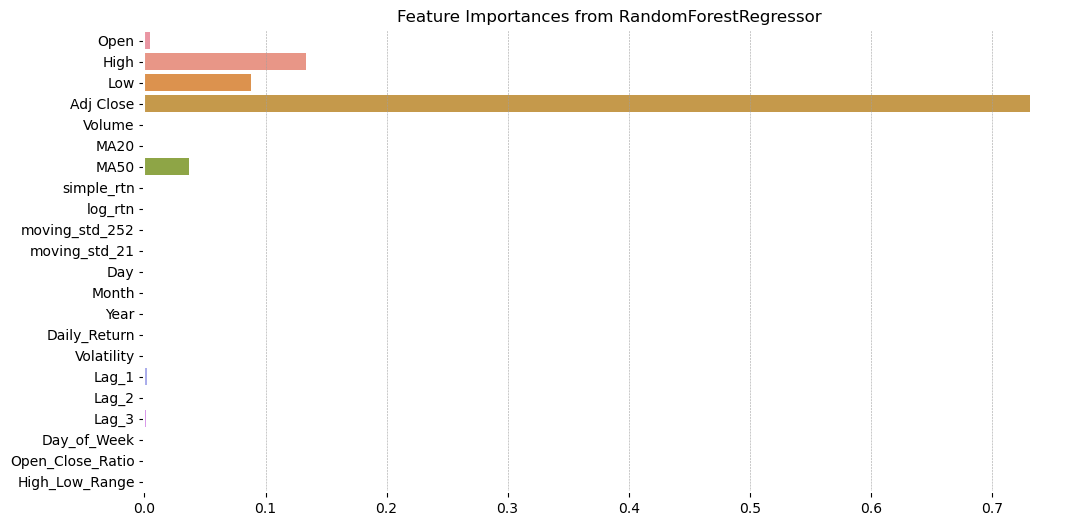

In [54]:
from sklearn.ensemble import RandomForestRegressor

# Prepare the data (example using Close price prediction)
X = data.drop(columns=['Close'])
y = data['Close']

# Drop rows with NaN values that might have been introduced by shifting or rolling operations
X = X.dropna()
y = y[X.index]

# Train a random forest model
model = RandomForestRegressor(n_estimators=100)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Display feature importances
for name, importance in zip(feature_names, importances):
    print(f"Feature: {name}, Importance: {importance}")

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances from RandomForestRegressor")
plt.show()

In [56]:
# Model Building
# ARIMA Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Load the data
file_path =("C:\\Users\\devika\\OneDrive\\Desktop\\p4-28.csv") 
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())
print(data.columns)

         Date       Open       High        Low      Close  Adj Close  \
0  05-01-2004  53.898628  57.016964  53.568394  56.700886  42.897266   
1  06-01-2004  56.799953  58.436962  55.865868  56.719753  42.911533   
2  07-01-2004  57.809521  57.809521  55.125206  56.290455  42.586750   
3  08-01-2004  56.799953  59.347462  56.799953  58.569057  44.310638   
4  09-01-2004  59.253109  61.423206  58.970051  60.390053  45.688313   

       Volume  
0  68132760.0  
1  84466581.0  
2  71533904.0  
3  44911270.0  
4  73303987.0  
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


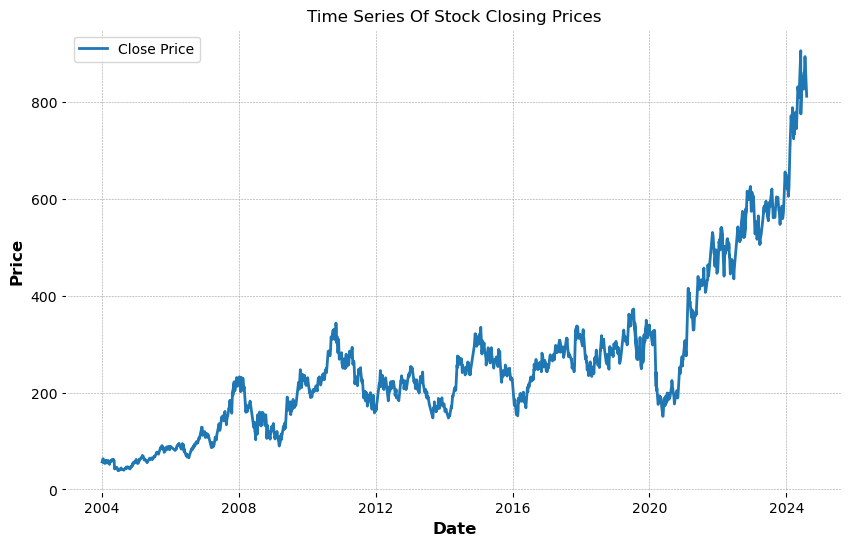

In [57]:
# Convert the 'Date' column to datetime format with the correct format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Check for missing values
data.isnull().sum()

# Fill or drop missing values if any
data.dropna(inplace=True)

# Visualize the closing price data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.title('Time Series Of Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [58]:
# Perform Augmented Dickey-Fuller test
result = adfuller(data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 0.9039497729030066
p-value: 0.9931416560444218


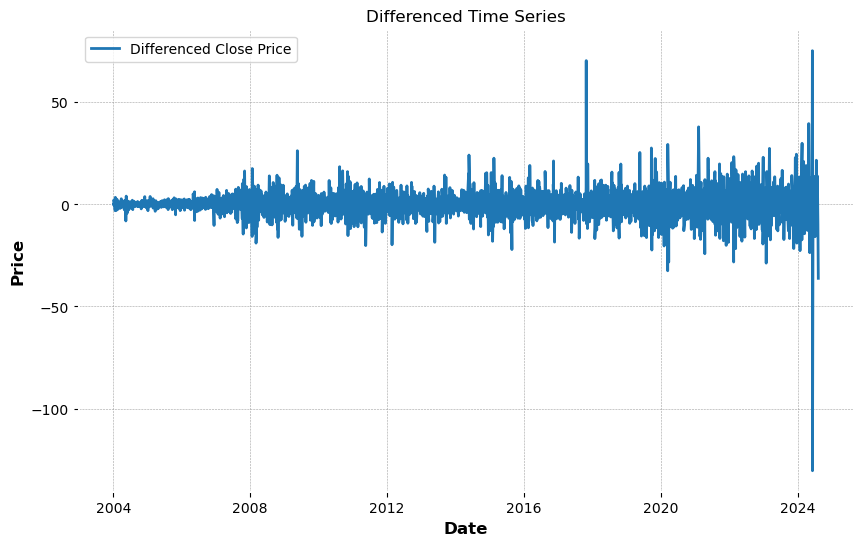

In [59]:
# Differencing the data
data_diff = data['Close'].diff().dropna()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(data_diff, label='Differenced Close Price')
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

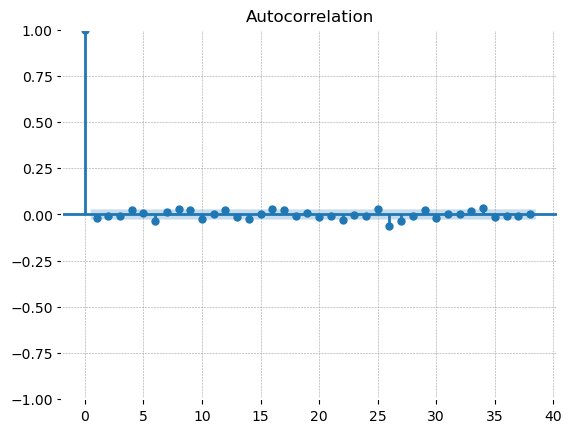

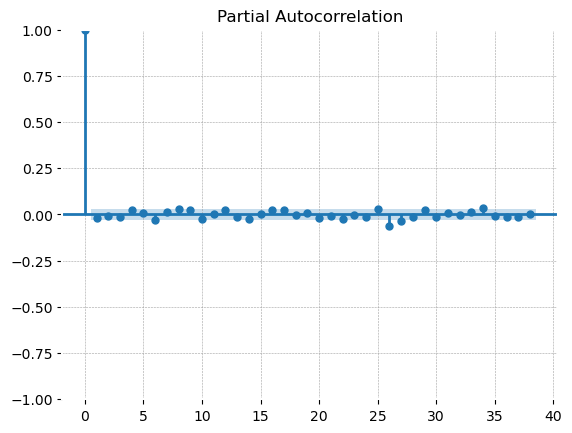

C:\Users\devika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\devika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\devika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5091
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -16384.151
Date:                Thu, 22 Aug 2024   AIC                          32774.302
Time:                        11:03:23   BIC                          32793.907
Sample:                             0   HQIC                         32781.167
                               - 5091                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3236      0.414      0.782      0.434      -0.487       1.134
ma.L1         -0.3416      0.412     -0.829      0.407      -1.150       0.466
sigma2        36.5914      0.216    169.719      0.0

In [60]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Differencing the data to make it stationary
data_diff = data['Close'].diff().dropna()

# Plot ACF and PACF to determine p and q
plot_acf(data_diff)
plot_pacf(data_diff)
plt.show()

# Define p, d, q based on analysis (example values)
p = 1
d = 1
q = 1

# Build and fit the ARIMA model
model = ARIMA(data['Close'], order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

In [61]:
# Forecast future values
forecast = model_fit.forecast(steps=10)  # Forecast the next 10 days
print(forecast)

5091    812.413100
5092    812.660046
5093    812.739962
5094    812.765825
5095    812.774194
5096    812.776903
5097    812.777780
5098    812.778063
5099    812.778155
5100    812.778185
Name: predicted_mean, dtype: float64


C:\Users\devika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\devika\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


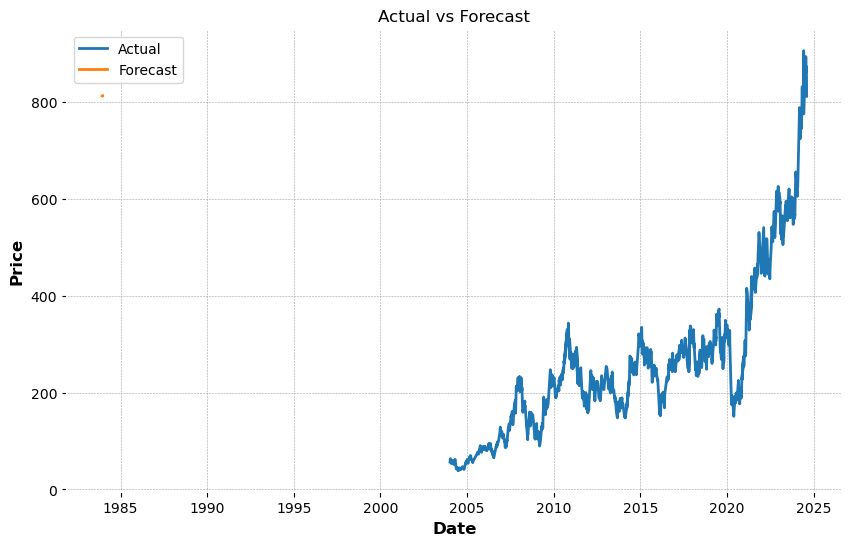

In [62]:
# Plot the actual and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.title('Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [64]:
!pip install pmdarima


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ------------------------------ --------- 471.0/614.7 kB 9.8 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 10.9 MB/s eta 0:00:01
   ------------ --------------------------- 0.9/2.8 MB 11.2 MB/s eta 0:00:01
   ----------------- ---------------------- 1.2/2.8 MB 9.6 MB/s eta 0:00:01
   ---------------------- ----------------- 1.5/2.8 MB 9.8 MB/s eta 0:00:01
   -------------------------- ------------- 1.9/2.8 MB 9.2 MB/s eta 0:00:01
   ------------------------------- -------- 2.2/2.8 MB 8.8 MB/s eta 0:00:01
   ------------------------------------ --- 2.6/2.8 MB 8.6 MB/s eta 0:00:01
   ---------------------------------------  2.8/2.8 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 8.1 MB/s eta 0:00:00


In [65]:
# Tuning Hyperparameters for ARIMA Models
import pmdarima as pm

# Auto ARIMA model for selecting p, d, q
model = pm.auto_arima(data['Close'], start_p=1, start_q=1, max_p=5, max_q=5, seasonal=False, trace=True)

# Fit the model
model.fit(data['Close'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=32773.056, Time=3.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32771.077, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=32771.491, Time=0.46 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=32771.460, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32772.137, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 4.670 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

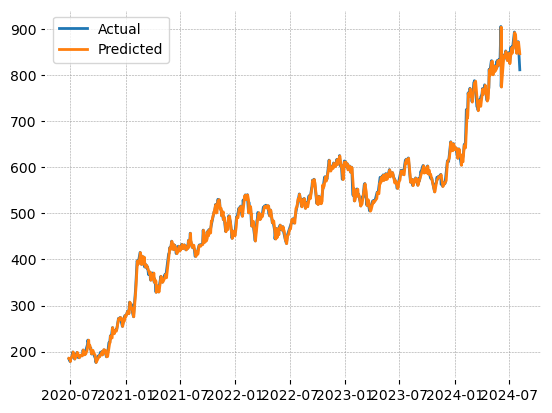

In [66]:
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data for regression (using lagged values)
data['Lag1'] = data['Close'].shift(1)
data.dropna(inplace=True)

# Split the data into training and testing sets
X = data[['Lag1']]
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.legend()
plt.show()


In [67]:
# Cross-Validation for Time Series Models
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

tscv = TimeSeriesSplit(n_splits=5)
model = LinearRegression()

mse_values = []
rmse_values = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Reshape if necessary
    X_train = X_train.values.reshape(X_train.shape[0], -1)
    X_test = X_test.values.reshape(X_test.shape[0], -1)
    
    # Ensure y is 1D
    y_train = y_train.ravel()
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    
    mse_values.append(mse)
    rmse_values.append(rmse)
    
    print(f'MSE: {mse}, RMSE: {rmse}')

print(f'Average MSE: {np.mean(mse_values)}')
print(f'Average RMSE: {np.mean(rmse_values)}')

MSE: 22.817929332986193, RMSE: 4.776811628375793
MSE: 19.969094287457402, RMSE: 4.468679255379312
MSE: 24.348684066229264, RMSE: 4.934438576599091
MSE: 48.70186666913113, RMSE: 6.978672271222595
MSE: 101.63865356875928, RMSE: 10.081599752457905
Average MSE: 43.49524558491265
Average RMSE: 6.2480402968069395


Mean Squared Error: 44311.424494545594


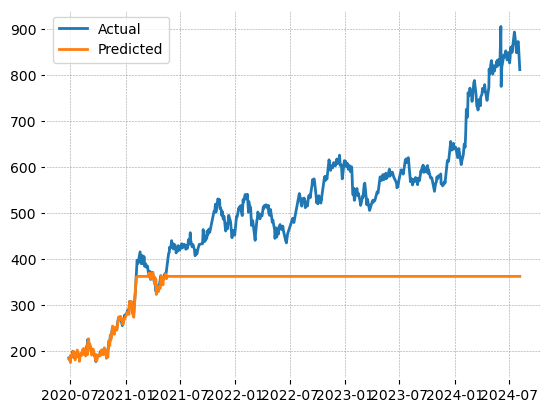

In [68]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.legend()
plt.show()

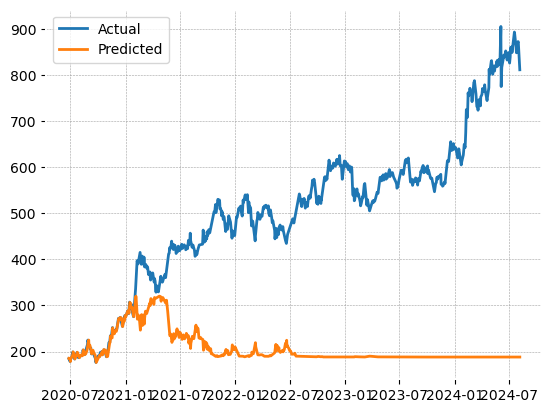

In [69]:
# Support Vector Machines (SVM)
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scaling the data for SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Build the SVM model
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.legend()
plt.show()

C:\Users\devika\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - loss: 0.0125
Epoch 2/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 2.7793e-04
Epoch 3/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 2.4209e-04
Epoch 4/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 2.4145e-04
Epoch 5/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 2.2278e-04
Epoch 6/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 2.1608e-04
Epoch 7/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 1.8854e-04
Epoch 8/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 1.7747e-04
Epoch 9/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 1.6011e-04
Epoch 10/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 1.7503e-04
Epoch 11/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 1.6930e-04
Epoch 12/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 1.3702e-04
Epoch 13/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - loss: 1.2780e-04
Epoch 14/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - loss:

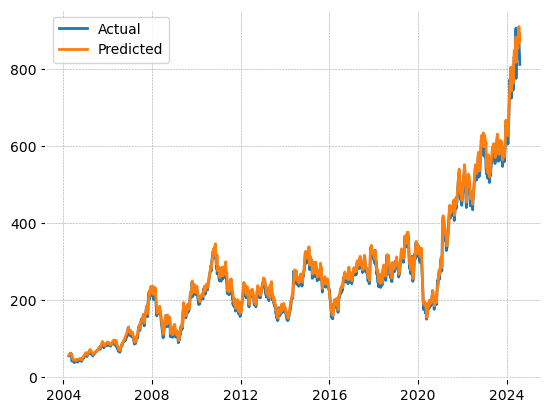

In [70]:
# LSTM (Long Short-Term Memory)
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']])

# Create the training data (X_train, y_train)
X_train = []
y_train = []
for i in range(60, len(scaled_data)):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Predict and visualize
predicted_prices = model.predict(X_train)
predicted_prices = scaler.inverse_transform(predicted_prices)

plt.plot(data.index[60:], data['Close'][60:], label='Actual')
plt.plot(data.index[60:], predicted_prices, label='Predicted')
plt.legend()
plt.show()

In [71]:
# Sentiment Analysis (Natural Language Processing)
from textblob import TextBlob

# Example data: Assume we have a column of news headlines related to stocks
# For demonstration purposes only (replace with actual data)
news_data = pd.DataFrame({
    'Date': pd.to_datetime(['2024-08-10', '2024-08-11', '2024-08-12']),
    'Headline': ['Stock market surges amid economic optimism',
                 'Tech stocks tumble after earnings reports',
                 'Federal Reserve hints at interest rate hikes']
})

# Analyze sentiment
news_data['Sentiment'] = news_data['Headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(news_data)


        Date                                      Headline  Sentiment
0 2024-08-10    Stock market surges amid economic optimism        0.2
1 2024-08-11     Tech stocks tumble after earnings reports        0.0
2 2024-08-12  Federal Reserve hints at interest rate hikes        0.0


In [73]:
# FBPROPHET Model
# Load the data
import pandas as pd
from prophet import Prophet

data = pd.read_csv("C:\\Users\\devika\\OneDrive\\Desktop\\p4-28.csv")

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Prophet requires the data to have two specific columns: 'ds' for the date and 'y' for the target variable
df = data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Display the first few rows to ensure the data is correctly formatted
df.head()

,ds,y
0,2004-01-05,56.700886
1,2004-01-06,56.719753
2,2004-01-07,56.290455
3,2004-01-08,58.569057
4,2004-01-09,60.390053


In [74]:
# Initialize the Prophet model
model = Prophet()

# Fit the model to the data
model.fit(df)

11:11:20 - cmdstanpy - INFO - Chain [1] start processing
11:11:23 - cmdstanpy - INFO - Chain [1] done processing


In [75]:
# Create a DataFrame to hold future dates (e.g., next 365 days)
future = model.make_future_dataframe(periods=365)

# Display the future DataFrame
future.tail()

,ds
5451,2025-08-01
5452,2025-08-02
5453,2025-08-03
5454,2025-08-04
5455,2025-08-05


In [76]:
# Make predictions
forecast = model.predict(future)

# Display the forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5451,2025-08-01,905.369128,841.834113,969.366256
5452,2025-08-02,839.671378,775.661968,900.997885
5453,2025-08-03,887.704226,824.993679,953.332859
5454,2025-08-04,905.552441,843.019146,970.639007
5455,2025-08-05,905.549801,841.880583,971.928858


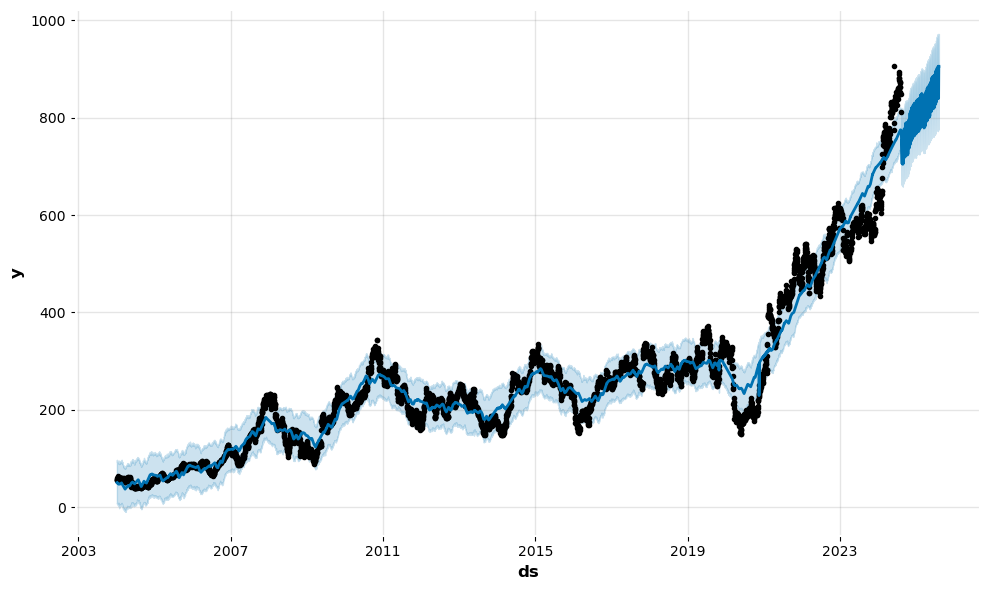

In [77]:
# Plot the forecast
fig1 = model.plot(forecast)
plt.show()

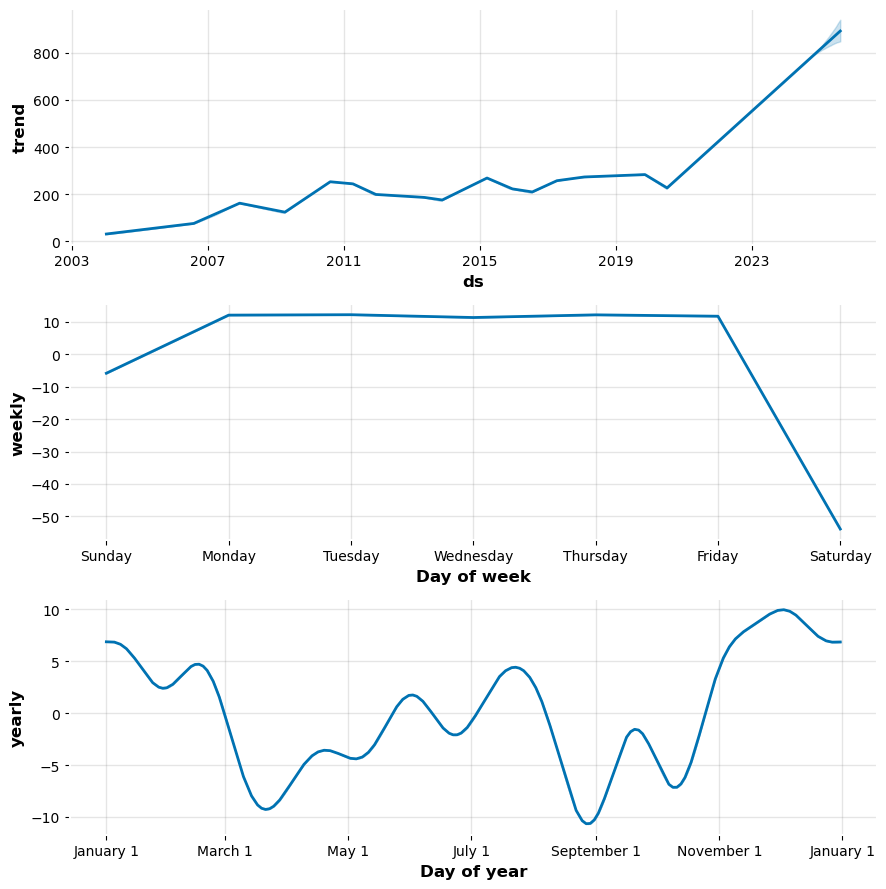

In [78]:
# Plot the components of the forecast
fig2 = model.plot_components(forecast)
plt.show()

In [79]:
# Assuming df contains the original data and forecast contains the Prophet forecast
merged_df = pd.merge(df, forecast[['ds', 'yhat']], on='ds', how='left')

In [80]:
# Check for NaN values in the merged dataframe
print(merged_df.isna().sum())

# Display rows with NaN values
print(merged_df[merged_df.isna().any(axis=1)])

ds      0
y       9
yhat    9
dtype: int64
             ds   y  yhat
80   2004-04-26 NaN   NaN
202  2004-10-13 NaN   NaN
1518 2010-02-06 NaN   NaN
1996 2012-01-07 NaN   NaN
2035 2012-03-03 NaN   NaN
2165 2012-09-08 NaN   NaN
2207 2012-11-11 NaN   NaN
2544 2014-03-22 NaN   NaN
2773 2015-02-28 NaN   NaN


In [81]:
# Remove rows with NaN values
merged_df = merged_df.dropna()

In [82]:
merged_df.head()

,ds,y,yhat
0,2004-01-05,56.700886,50.359830
1,2004-01-06,56.719753,50.496973
2,2004-01-07,56.290455,49.622379
3,2004-01-08,58.569057,50.413479
4,2004-01-09,60.390053,49.933464


In [83]:
from sklearn.metrics import mean_squared_error

# Calculate MSE between actual and predicted values
mse_prophet = mean_squared_error(merged_df['y'], merged_df['yhat'])
print(f"Prophet Model Mean Squared Error: {mse_prophet}")

Prophet Model Mean Squared Error: 1172.3120227541524
